In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.base import clone
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('bmh')

In [2]:
dftrain = pd.read_csv('/Users/mwirvine/galvanize/dsi-immersive/dsi-module1-capstone/ecuador-grocery-data/dftrain_enriched_dummies_forplotting.csv')

In [3]:
df_test = dftrain.sample(10000)

In [4]:
df_test.columns

Index(['Unnamed: 0', 'unit_sales', 'onpromotion', 'item_perishable',
       'store_avg_daily_txns', 'store_txn_for_day', 'oil_daily_price',
       'holiday_eve_natl', 'holiday_eve_loc', 'holiday_eve_reg',
       ...
       'item_nbr_1288226', 'item_nbr_1288843', 'item_nbr_1422347',
       'item_nbr_1903500', 'item_nbr_1903501', 'item_class_2302',
       'item_class_2304', 'item_class_2306', 'item_class_2340',
       'item_class_2372'],
      dtype='object', length=249)

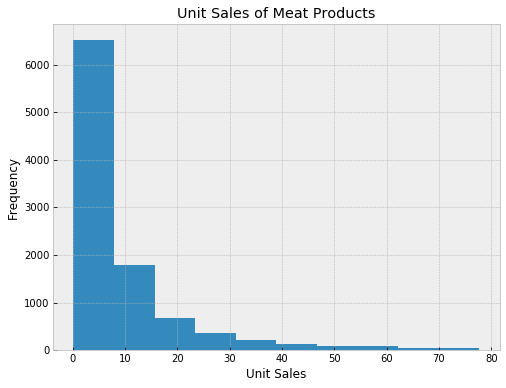

In [5]:
fig1 = plt.figure(figsize = (8,6))
ax1 = fig1.add_subplot(111)
ax1.hist(df_test['unit_sales'])
ax1.set_xlabel('Unit Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Unit Sales of Meat Products')
plt.savefig('hist_unitsales.png');

In [6]:
X = df_test.drop('unit_sales', axis=1).values.astype(np.float64)
y = df_test['unit_sales'].values.astype(np.float64)
#y = np.log(y)

In [7]:
def rmse(true, predicted):
    residuals_squared = (predicted - true)**2
    variance = sum(residuals_squared) / len(true)
    rmse = np.sqrt(variance)
    return rmse

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
# standardize data
standardizer = StandardScaler()
standardizer.fit(X_train)
X_train_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

In [10]:
### LINEAR REGRESSION
linear = LinearRegression()
linear.fit(X_train_std, y_train)
y_pred_train_linear = linear.predict(X_train_std)
y_pred_test_linear = linear.predict(X_test_std)

resid_test_linear = y_test - y_pred_test_linear
resid_train_linear = y_train - y_pred_train_linear

train_rmse_linear = rmse(y_train, y_pred_train_linear)
test_rmse_linear = rmse(y_test, y_pred_test_linear)

print(test_rmse_linear)


8.62057494907


In [11]:
### LASSO REGRESSION
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_std, y_train)
y_pred_train_lasso = lasso.predict(X_train_std)
y_pred_test_lasso = lasso.predict(X_test_std)

train_rmse_lasso = rmse(y_train, y_pred_train_lasso)
test_rmse_lasso = rmse(y_test, y_pred_test_lasso)

resid_test_lasso = y_test - y_pred_test_lasso
resid_train_lasso = y_train - y_pred_train_lasso

print(test_rmse_lasso)

8.64417034381


In [12]:
### RIDGE REGRESSION
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_std, y_train)
y_pred_train_ridge = ridge.predict(X_train_std)
y_pred_test_ridge = ridge.predict(X_test_std)

train_rmse_ridge = rmse(y_train, y_pred_train_ridge)
test_rmse_ridge = rmse(y_test, y_pred_test_ridge)

resid_test_ridge = y_test - y_pred_test_ridge
resid_train_ridge = y_train - y_pred_train_ridge

print(test_rmse_ridge)

8.60724648007


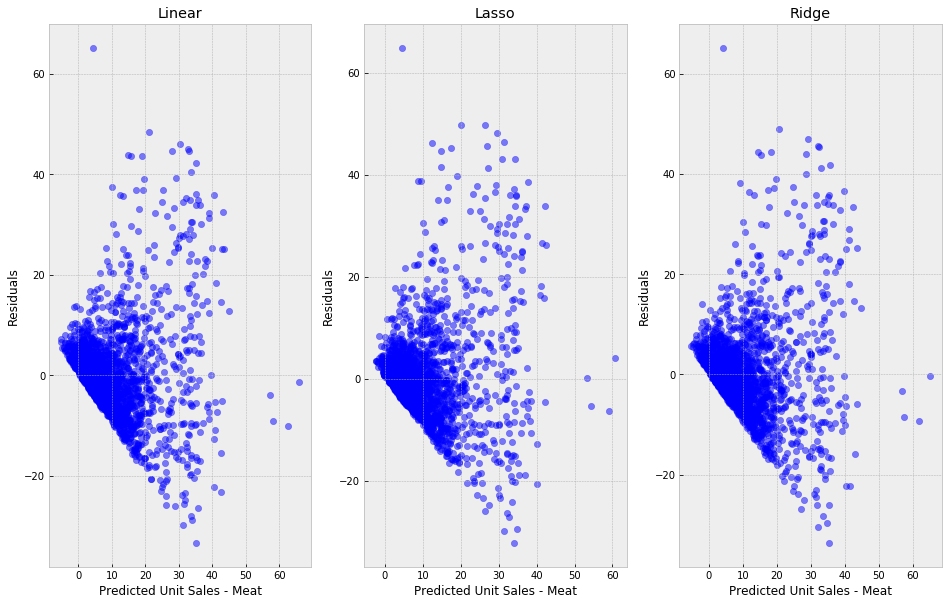

In [14]:
fig1 = plt.figure(figsize = (16,10))

ax1 = fig1.add_subplot(131)
ax1.scatter(y_pred_test_linear, resid_test_linear, c='b', s=40, alpha=0.5)
#ax1.scatter(y_pred_train_linear, resid_train_linear, c='g', s=40)
ax1.set_xlabel('Predicted Unit Sales - Meat')
ax1.set_ylabel('Residuals')
ax1.set_title('Linear')

ax2 = fig1.add_subplot(132)
ax2.scatter(y_pred_test_lasso, resid_test_lasso, c='b', s=40, alpha=0.5)
#ax2.scatter(y_pred_train_lasso, resid_train_lasso, c='g', s=40)
ax2.set_xlabel('Predicted Unit Sales - Meat')
ax2.set_ylabel('Residuals')
ax2.set_title('Lasso')

ax3 = fig1.add_subplot(133)
ax3.scatter(y_pred_test_ridge, resid_test_ridge, c='b', s=40, alpha=0.5)
#ax3.scatter(y_pred_train_ridge, resid_train_ridge, c='g', s=40)
ax3.set_xlabel('Predicted Unit Sales - Meat')
ax3.set_ylabel('Residuals')
ax3.set_title('Ridge')
plt.savefig('residualvpredicted.png');

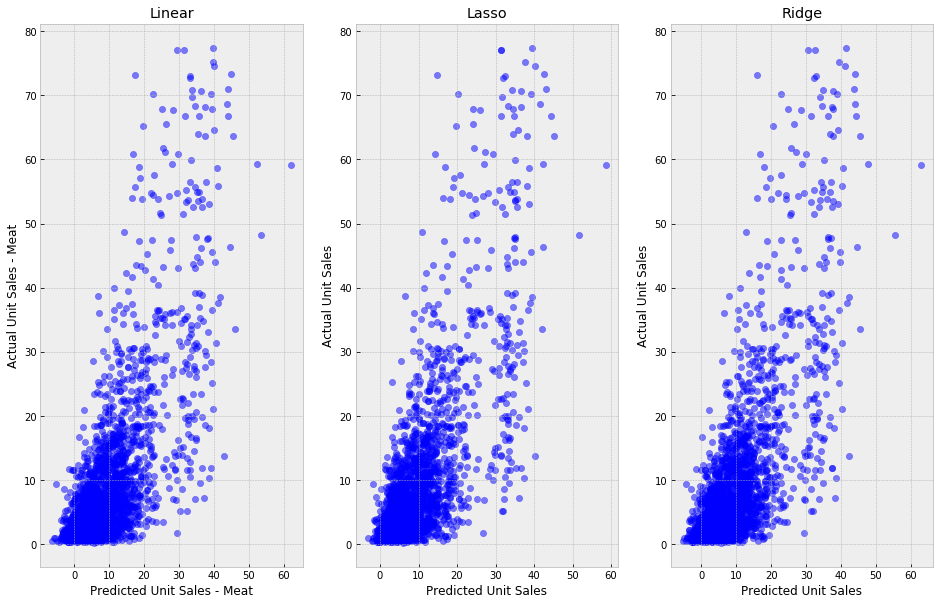

In [74]:
fig2 = plt.figure(figsize = (16,10))

ax4 = fig2.add_subplot(131)
ax4.scatter(y_pred_test_linear, y_test, c='b', s=40, alpha=0.5)
ax4.set_xlabel('Predicted Unit Sales - Meat')
ax4.set_ylabel('Actual Unit Sales - Meat')
ax4.set_title('Linear')

ax5 = fig2.add_subplot(132)
ax5.scatter(y_pred_test_lasso, y_test, c='b', s=40, alpha=0.5)
ax5.set_xlabel('Predicted Unit Sales')
ax5.set_ylabel('Actual Unit Sales')
ax5.set_title('Lasso')

ax6 = fig2.add_subplot(133)
ax6.scatter(y_pred_test_ridge, y_test, c='b', s=40, alpha=0.5)
ax6.set_xlabel('Predicted Unit Sales')
ax6.set_ylabel('Actual Unit Sales')
ax6.set_title('Ridge');

In [214]:
from pandas.plotting import scatter_matrix